In [11]:
!pip install numpy matplotlib pandas tqdm


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
with open("metrics.json", encoding="utf-8") as f:
    data = json.load(f)

In [14]:
df = pd.DataFrame(data)
df.sort_values("duration", ascending=True)

,duration,value,size,runtime,device,block_size,grid_size
169,0.046116,0.332568,100000000,OpenBLAS,CPU,NaN,NaN
181,0.046131,0.332568,100000000,OpenBLAS,CPU,NaN,NaN
177,0.046148,0.332568,100000000,OpenBLAS,CPU,NaN,NaN
151,0.046186,0.332568,100000000,OpenBLAS,CPU,NaN,NaN
185,0.046187,0.332568,100000000,OpenBLAS,CPU,NaN,NaN
...,...,...,...,...,...,...,...
170,1.082007,0.333281,100000000,OpenCL Reduction,NVIDIA GeForce RTX 2060,32.0,100000000.0
178,1.248092,1.151063,100000000,OpenCL Reduction,NVIDIA GeForce RTX 2060,128.0,100000000.0
182,1.741187,1.998321,100000000,OpenCL Reduction,NVIDIA GeForce RTX 2060,256.0,100000000.0
186,2.973316,3.984380,100000000,OpenCL Reduction,NVIDIA GeForce RTX 2060,512.0,100000000.0


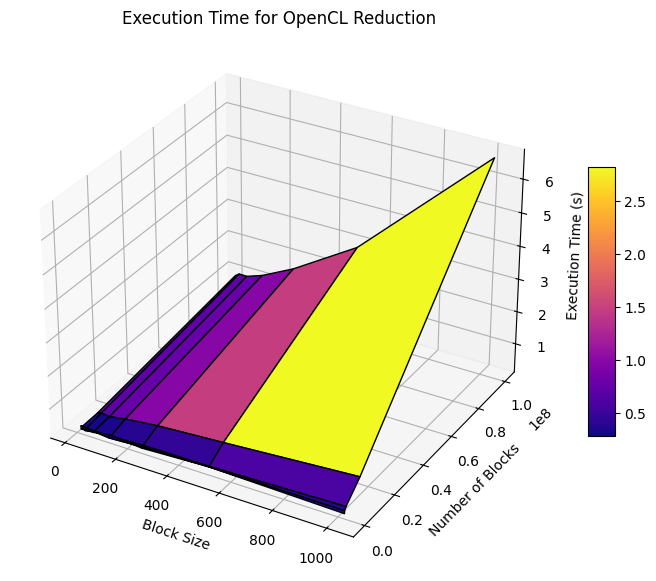

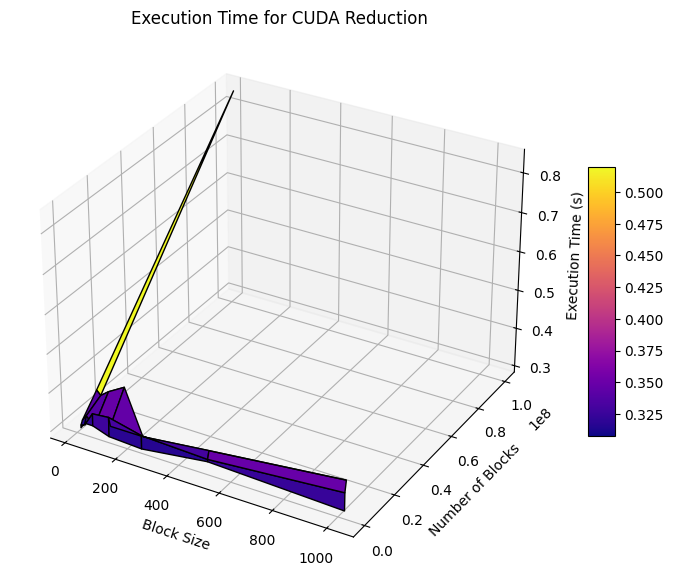

In [15]:
runtimes = df["runtime"].unique()

for target_runtime in ['OpenCL Reduction', 'CUDA Reduction']:
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['grid_size'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['grid_size'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')

    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
